# South African Language Identification Hack 2023

© Explore Data Science Academy

---
### Honour Code

I {**MARK KASAVULI**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


# ExploreAI Academy Classification Hackathon
## Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages

<br></br>

<div align="center" style="width: 1200px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=1200px/>

</div>

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

https://bilingua.io/how-to-say-hello-in-100-languages

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages



In [1]:
# Libraries for data loading, data manipulation, and data visualization
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook
import string

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Load the data
df_train = pd.read_csv("train_set.csv")
df_test = pd.read_csv("test_set.csv")

In [3]:
df_train.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [4]:
with pd.option_context('display.max_colwidth', None):
  display(df_train)

lang_id  \
0         xho   
1         xho   
2         eng   
3         nso   
4         ven   
...       ...   
32995     tsn   
32996     sot   
32997     eng   
32998     xho   
32999     sot   

                                                                                                                                                                                                                                                                                                             text  
0                                                                                    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika  
1                                                    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo  
2                                        the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months  
3                                                                                       o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj  
4                                                                 khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso  
...                                                                                                                                                                                                                                                                                                           ...  
32995                            popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham  
32996  modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela  
32997                                                                              closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address  
32998                                                                        nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa  
32999                                                                                                mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha  

[33000 rows x 2 columns]

In [5]:
df_train.tail()

lang_id                                               text
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...
32997     eng  closing date for the submission of completed t...
32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999     sot  mafapha a mang le ona a lokela ho etsa ditlale...

In [6]:
df_train.shape

(33000, 2)

In [7]:
df_test.head()

index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.

In [8]:
df_test.shape

(5682, 2)

<a id="three"></a>
## 3. Data Cleaning

| In this section, we performed indepth cleaning of the data |
---


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [11]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [12]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

### To remove the punction marks, @mentions and special characters, we create a function 

In [13]:
import re

def clean_text(text):
    ''' This function takes a array, list or series like objects containing text
        and removes all punctuation and converts to lower case
    '''
    
    # to convert to lower case
    text_clean = text.lower()
    
    
    # Remove punctuation marks
    text_clean = re.sub(r'[^\w\s]', '', text_clean)

    return text_clean

In [14]:
#df = df_train.copy() # assign the dataframe to a new object

#df = pd.concat([df_train,df_test])

df = df_train
df_kaggle = df_test

df['text'] = df['text'].apply(clean_text)
df_kaggle['text'] = df_kaggle['text'].apply(clean_text)

In [15]:
df.head()

lang_id                                               text
0     xho  umgaqosiseko wenza amalungiselelo kumaziko axh...
1     xho  idha iya kuba nobulumko bokubeka umsebenzi nap...
2     eng  the province of kwazulunatal department of tra...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [16]:
df_kaggle.head()

index                                               text
0      1  mmasepala fa maemo a a kgethegileng a letlelel...
1      2  uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3          tshivhumbeo tshi fana na ngano dza vhathu
3      4  kube inja nelikati betingevakala kutsi titsini...
4      5                       winste op buitelandse valuta

In [17]:
df.shape

(33000, 2)

In [18]:
# check for duplicate row in the data frame

df.duplicated().sum()

3063

In [19]:
with pd.option_context('display.max_colwidth', None):
  display(df)

lang_id  \
0         xho   
1         xho   
2         eng   
3         nso   
4         ven   
...       ...   
32995     tsn   
32996     sot   
32997     eng   
32998     xho   
32999     sot   

                                                                                                                                                                                                                                                                                                             text  
0                                                                                     umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika  
1                                                      idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo  
2                                         the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months  
3                                                                                       o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj  
4                                                                 khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso  
...                                                                                                                                                                                                                                                                                                           ...  
32995                            popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham  
32996  modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela  
32997                                                                              closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address  
32998                                                                        nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa  
32999                                                                                                 mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisikakaretso wa lefapha  

[33000 rows x 2 columns]

In [20]:
# Remove duplicate rows while retaining the original row
df = df.drop_duplicates().reset_index(drop=True)

In [21]:
# check for duplicate row in the data frame

df.duplicated().sum()

0

In [22]:
with pd.option_context('display.max_colwidth', None):
  display(df)

lang_id  \
0         xho   
1         xho   
2         eng   
3         nso   
4         ven   
...       ...   
29932     eng   
29933     tsn   
29934     eng   
29935     xho   
29936     sot   

                                                                                                                                                                                                                                                                                   text  
0                                                           umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika  
1                            idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo  
2               the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months  
3                                                             o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj  
4                                       khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso  
...                                                                                                                                                                                                                                                                                 ...  
29932                                    manuel marin s illfated debt sources but very little from fiscu would like to take this relief initiative in marin s acp countries opportunity to wish bongi the proposal to write off all acp notwithstanding the best of luck in her new job  
29933  popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham  
29934                                                    closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address  
29935                                              nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa  
29936                                                                       mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisikakaretso wa lefapha  

[29937 rows x 2 columns]

#### NOTE: | Our data is relatively clean now we can move on with the EDA section to understand more about the data |

In [23]:
with pd.option_context('display.max_colwidth', None):
  display(df)

lang_id  \
0         xho   
1         xho   
2         eng   
3         nso   
4         ven   
...       ...   
29932     eng   
29933     tsn   
29934     eng   
29935     xho   
29936     sot   

                                                                                                                                                                                                                                                                                   text  
0                                                           umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika  
1                            idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo  
2               the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months  
3                                                             o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj  
4                                       khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso  
...                                                                                                                                                                                                                                                                                 ...  
29932                                    manuel marin s illfated debt sources but very little from fiscu would like to take this relief initiative in marin s acp countries opportunity to wish bongi the proposal to write off all acp notwithstanding the best of luck in her new job  
29933  popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham  
29934                                                    closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address  
29935                                              nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa  
29936                                                                       mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisikakaretso wa lefapha  

[29937 rows x 2 columns]

## 4. Exploratory Data Analysis (EDA)


| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |
---

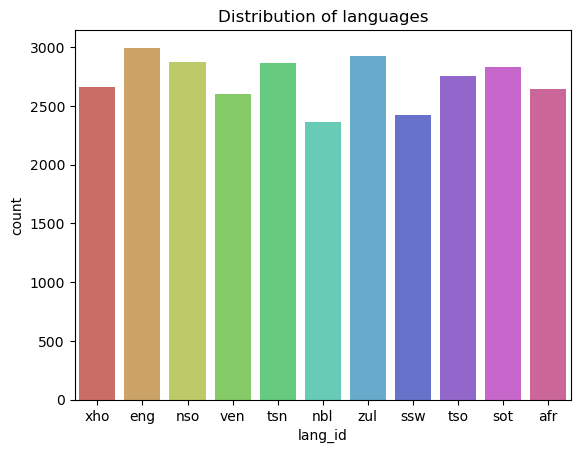

In [76]:
# To visualize the distributon of the 11 languages spoken in South Africa

sns.countplot(x = 'lang_id', data = df, palette="hls")
plt.title("Distribution of languages");

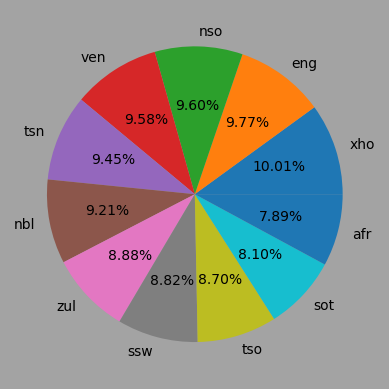

In [25]:
pie_x = df.lang_id.value_counts()
labels = df.lang_id.unique()

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(df['lang_id'].value_counts(),autopct='%0.2f%%', labels = labels)
plt.show()

#### Observation: 

- From the pie chart above, we can deduce that we have 11 different language
- The languages are approximately equally distributed

### Lets explore the text to generate insights

In [26]:
# install the wordcloud to create the word visuals

!pip install wordcloud

#### To create a word cloud we first need to tokenize the text to then create a  word cloud

- The word clouds will be divided into the 11 languages used in South Africa

In [27]:
# import the word tokenizer to tokenize the twts, and lemmatizer to find the root word of the words in each message
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [75]:
# tokenize the text
df['text'] = df['text'].apply(lambda x: x.split())
df_kaggle['text'] = df_kaggle['text'].apply(lambda x: x.split())


AttributeError: 'list' object has no attribute 'split'

In [29]:
df['clean_text'] = df['text'].apply(lambda x: ' '.join(x))
df_kaggle['clean_text'] = df_kaggle['text'].apply(lambda x: ' '.join(x))

In [30]:
df.head()

lang_id                                               text  \
0     xho  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1     xho  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2     eng  [the, province, of, kwazulunatal, department, ...   
3     nso  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4     ven  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                          clean_text  
0  umgaqosiseko wenza amalungiselelo kumaziko axh...  
1  idha iya kuba nobulumko bokubeka umsebenzi nap...  
2  the province of kwazulunatal department of tra...  
3  o netefatša gore o ba file dilo ka moka tše le...  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [31]:
df_kaggle.head()

index                                               text  \
0      1  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...   
1      2  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...   
2      3  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]   
3      4  [kube, inja, nelikati, betingevakala, kutsi, t...   
4      5                  [winste, op, buitelandse, valuta]   

                                          clean_text  
0  mmasepala fa maemo a a kgethegileng a letlelel...  
1  uzakwaziswa ngokufaneleko nakungafuneka eminye...  
2          tshivhumbeo tshi fana na ngano dza vhathu  
3  kube inja nelikati betingevakala kutsi titsini...  
4                       winste op buitelandse valuta

#### I removed the English stopwords from the text since some of the text included a mixture of English and the other indigenous languages

In [32]:
# create a function that removes stop words
def remove_stopwords(text):
    
    # create a set containing the stopwords we wish to remove
    stop_words = set(stopwords.words('english'))
    
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words:
            y.append(i)
            
    return " ".join(y)

In [33]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)
df_kaggle['clean_text'] = df_kaggle['clean_text'].apply(remove_stopwords)
df.head()

lang_id                                               text  \
0     xho  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1     xho  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2     eng  [the, province, of, kwazulunatal, department, ...   
3     nso  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4     ven  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                          clean_text  
0  umgaqosiseko wenza amalungiselelo kumaziko axh...  
1  idha iya kuba nobulumko bokubeka umsebenzi nap...  
2  province kwazulunatal department transport inv...  
3  netefatša gore ba file dilo ka moka tše le dum...  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

### Generate the wordcloud for all words in the text

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [35]:
# visualize the frequent words using wordcloud
all_words = " ".join([sentence for sentence in df['clean_text']])

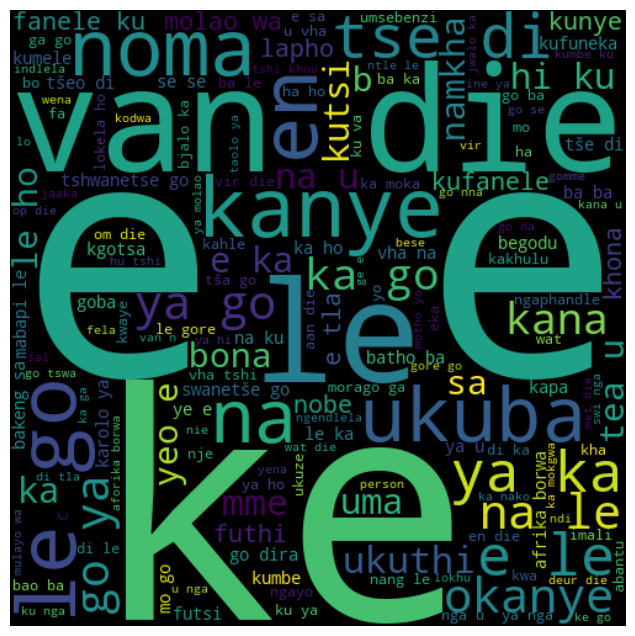

In [36]:
wordcloud_gen = wc.generate(all_words)
# plot the graph
plt.figure(figsize=(18,8))
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis('off')
plt.show()

#### English

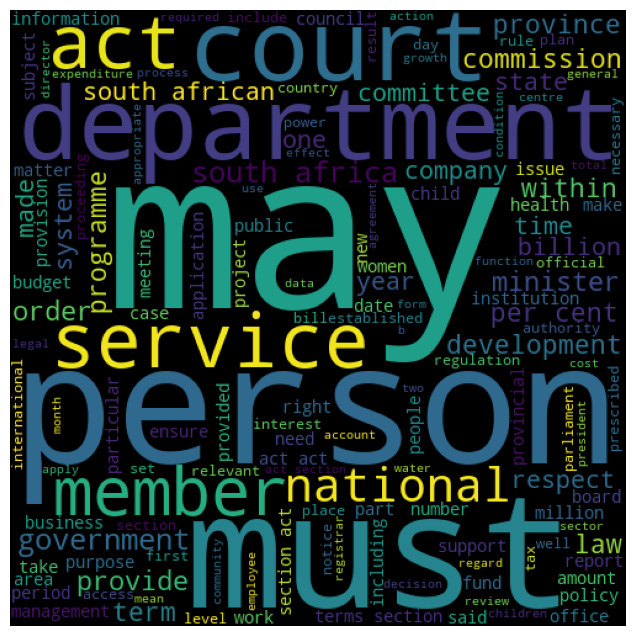

In [37]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'eng']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### isiXhosa

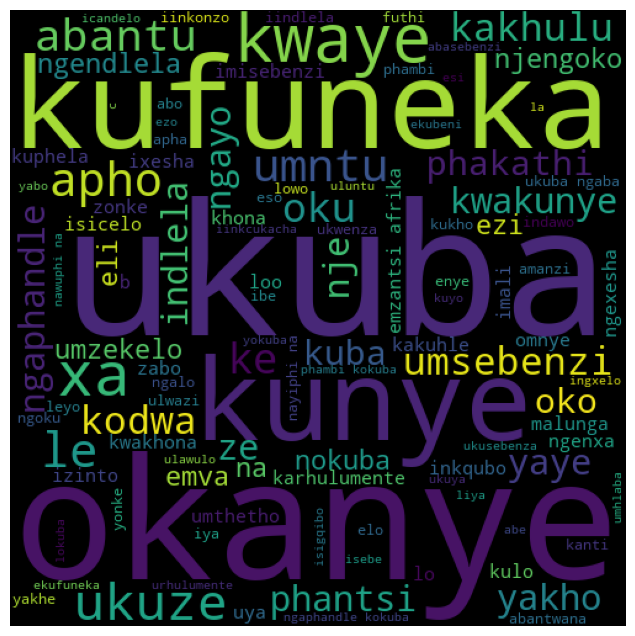

In [38]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'xho']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Afrikaans

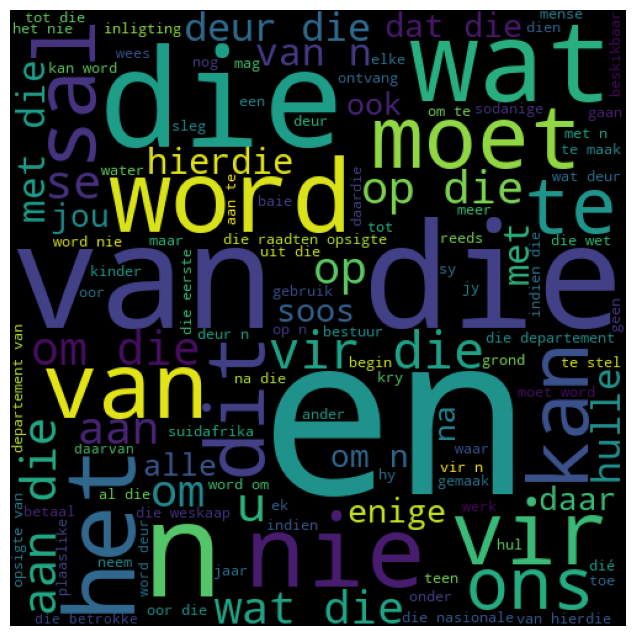

In [39]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'afr']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Ndebele

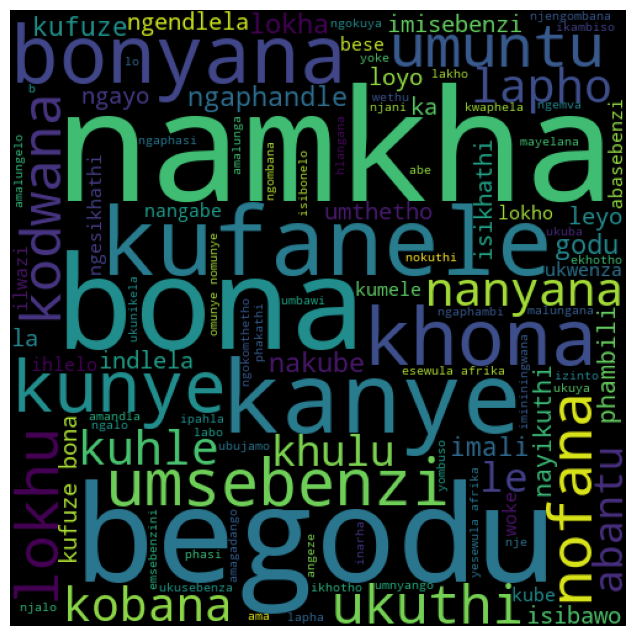

In [40]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'nbl']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()
plt.show()

#### Sepedi

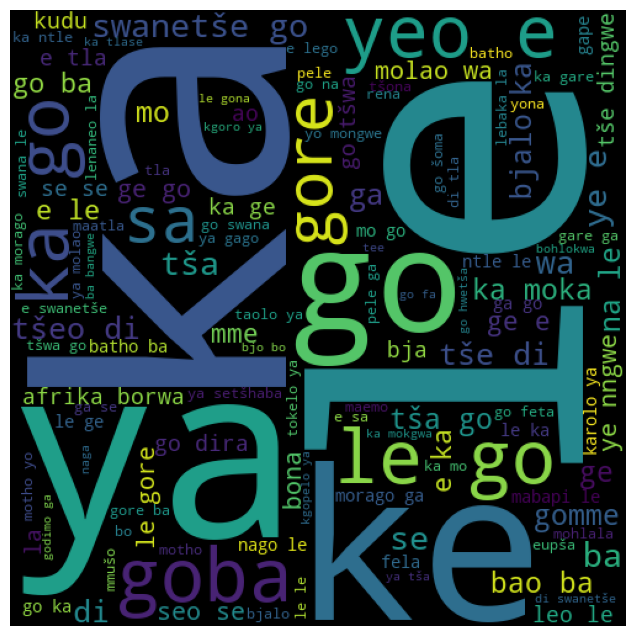

In [41]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'nso']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sesotho

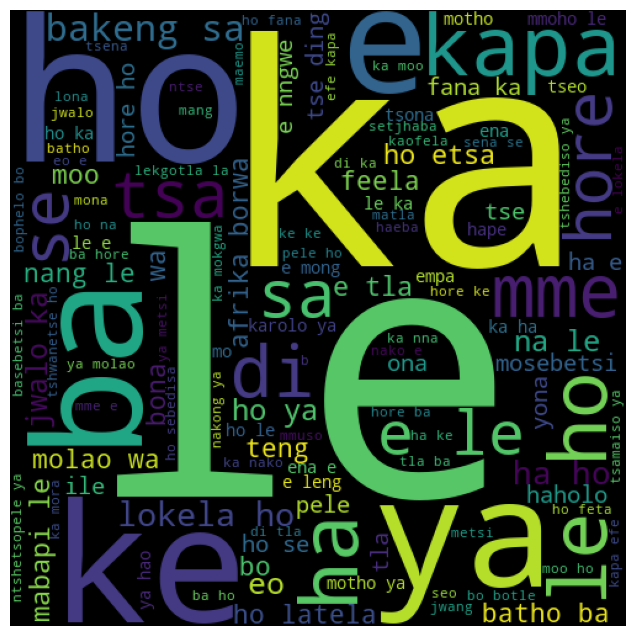

In [42]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'sot']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### siSwati

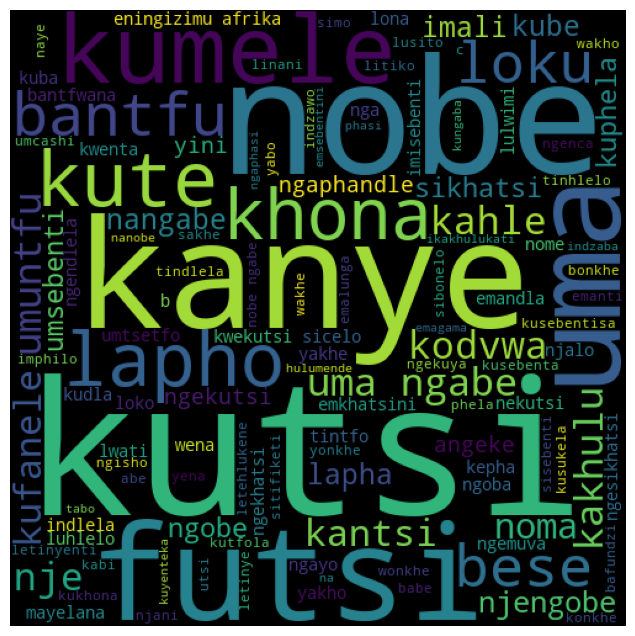

In [43]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'ssw']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Setswana

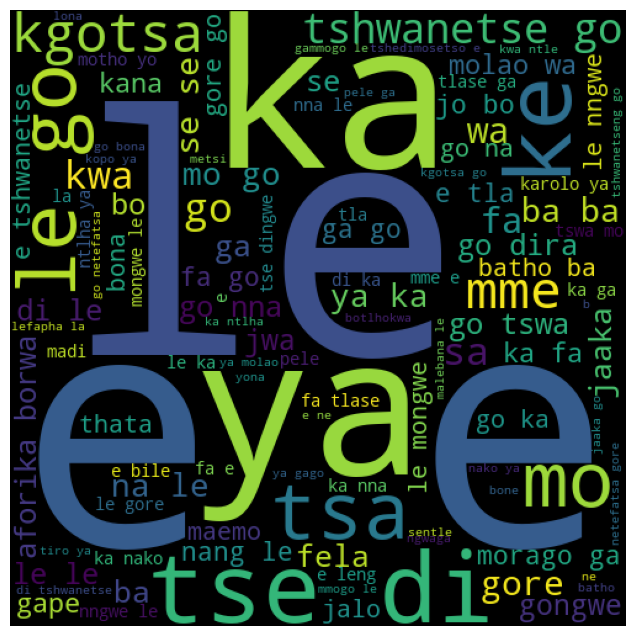

In [44]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'tsn']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Xitsonga

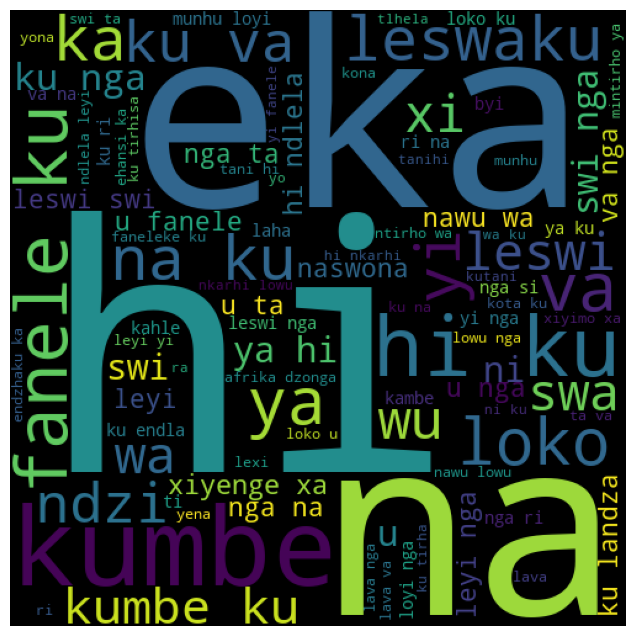

In [45]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'tso']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Tshivenda

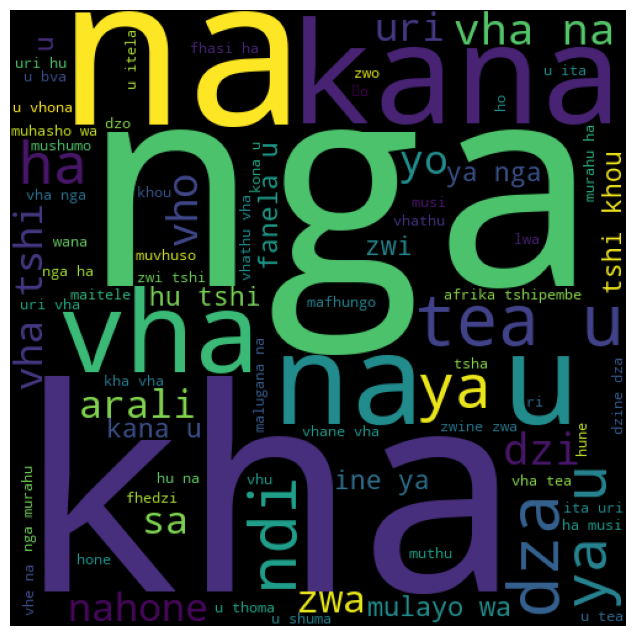

In [46]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'ven']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### isiZulu

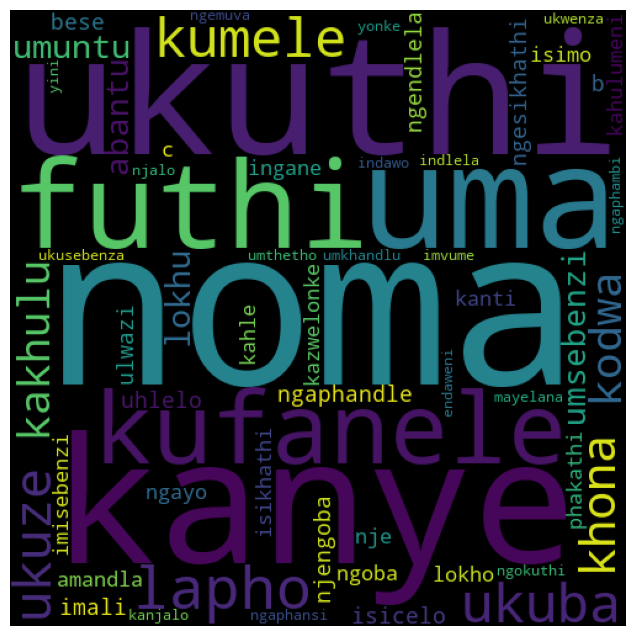

In [47]:
ptv_sentiment = wc.generate(df[df['lang_id'] == 'zul']['clean_text'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

## 4. Feature Engineering


| In this section, we extract features from the text data and tranform them into the appropriate format for training our model. |
---

In [48]:
df_new = df

In [49]:
df_new.head()

lang_id                                               text  \
0     xho  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1     xho  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2     eng  [the, province, of, kwazulunatal, department, ...   
3     nso  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4     ven  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                          clean_text  
0  umgaqosiseko wenza amalungiselelo kumaziko axh...  
1  idha iya kuba nobulumko bokubeka umsebenzi nap...  
2  province kwazulunatal department transport inv...  
3  netefatša gore ba file dilo ka moka tše le dum...  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [50]:
pie_x_new = df_new.lang_id.value_counts() # to check if there are data imbalances
pie_x_new

eng    2996
zul    2924
nso    2873
tsn    2869
sot    2829
tso    2757
xho    2658
afr    2640
ven    2605
ssw    2424
nbl    2362
Name: lang_id, dtype: int64

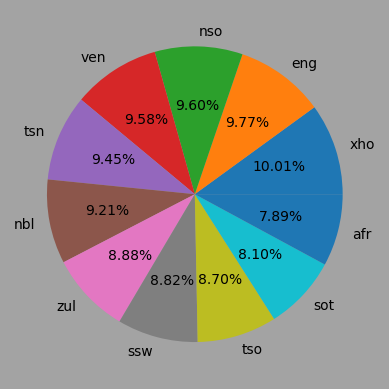

In [51]:
#plot pie chart to spot data imbalances
pie_x_new = df_new.lang_id.value_counts()
labels_new = df_new.lang_id.unique()


# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(pie_x_new ,autopct='%0.2f%%', labels = labels_new)
plt.show()

#### The languages seem to be approximately equally distributed. There is no significant data imbalance

In [52]:
df_new.head()

lang_id                                               text  \
0     xho  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1     xho  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2     eng  [the, province, of, kwazulunatal, department, ...   
3     nso  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4     ven  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                          clean_text  
0  umgaqosiseko wenza amalungiselelo kumaziko axh...  
1  idha iya kuba nobulumko bokubeka umsebenzi nap...  
2  province kwazulunatal department transport inv...  
3  netefatša gore ba file dilo ka moka tše le dum...  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [53]:
# Assigning the features and the labels

X = df_new.clean_text
#X = X.reshape(-1, 1) # reshape X to have 2 dimensions

y = df_new.lang_id

In [54]:
X

0        umgaqosiseko wenza amalungiselelo kumaziko axh...
1        idha iya kuba nobulumko bokubeka umsebenzi nap...
2        province kwazulunatal department transport inv...
3        netefatša gore ba file dilo ka moka tše le dum...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
29932    manuel marin illfated debt sources little fisc...
29933    popo ya dipolateforomo tse ke go tlisa boetele...
29934    closing date submission completed tenders augu...
29935    nawuphina umntu ofunyenwe enetyala phantsi kwa...
29936    mafapha mang le ona lokela ho etsa ditlaleho t...
Name: clean_text, Length: 29937, dtype: object

In [55]:
y

0        xho
1        xho
2        eng
3        nso
4        ven
        ... 
29932    eng
29933    tsn
29934    eng
29935    xho
29936    sot
Name: lang_id, Length: 29937, dtype: object

In [56]:
# Lets split the data using the sklearn train test_test_split module

from sklearn.model_selection import train_test_split

# Split the data set to training and validation data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

**I made use of the countvectorizer and TfidfTransformer for feature transformation on our text and converting it to binary array for our classifier**

In [57]:
# we'll use the pipeline module to combine both transformation and classifiers at a go?

from sklearn.pipeline import Pipeline, FeatureUnion # pipeline and FeatureUnion for concatenating both type of transformers features to read information captured by both transformers
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer
from sklearn.svm import SVC  # SVM classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

from sklearn.metrics import accuracy_score, f1_score, classification_report # evaluation metric

### First Model - SVC

**Use the sklearn pipeline module to link the transformation and feature extraction together**

In [58]:
# Define the pipeline steps

count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
svm_classifier = SVC(kernel='rbf')

svc_steps = [
    ('feature_union', FeatureUnion([
        ('count_vectorizer', count_vectorizer),
        ('tfidf_vectorizer', tfidf_vectorizer)
    ])),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe = Pipeline(svc_steps)

# Fit the pipeline to the training data
svc_pipe.fit(X_train, y_train)

# Evaluate on the test data
accuracy = svc_pipe.score(X_test, y_test)

# Make predictions on the testing data
y_pred_svc = svc_pipe.predict(X_test)


# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)

0.981629926519706


In [59]:
svc_pipe_report = classification_report(y_test, y_pred_svc)
print("\n\nClassification Report:\n\n", svc_pipe_report)



Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       537
         eng       0.97      1.00      0.98       583
         nbl       0.98      0.92      0.94       474
         nso       0.99      0.99      0.99       543
         sot       1.00      1.00      1.00       557
         ssw       0.96      0.98      0.97       457
         tsn       0.99      1.00      0.99       583
         tso       1.00      1.00      1.00       537
         ven       1.00      1.00      1.00       550
         xho       0.97      0.97      0.97       571
         zul       0.94      0.95      0.95       596

    accuracy                           0.98      5988
   macro avg       0.98      0.98      0.98      5988
weighted avg       0.98      0.98      0.98      5988



**Built another model using the tfidfvectorizer()**

In [60]:
svc_steps_tfidf = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe_tfidf = Pipeline(svc_steps_tfidf)

In [61]:
svc_pipe_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', SVC())])

In [62]:
svc_pipe_tfidf_pred = svc_pipe_tfidf.predict(X_test)

In [63]:
# created a function to calculate the accuracy score

def calculate_accuracy(clf, X_test, y_test):
    #your code here
    
    # use the trained model to carry out prediction
    y_pred = clf.predict(X_test)
    
    # check for accuracy
    acc = accuracy_score(y_test, y_pred)
    print(acc)

In [64]:
accuracy = calculate_accuracy(svc_pipe_tfidf, X_test, y_test)
accuracy

0.9859719438877755


In [65]:
# created a function to get the class report for each model created

def get_class_report(clf, X_test, y_test):
    #your code here
    
    # create the predictions
    y_pred = clf.predict(X_test)
    
    # create the report
    report = classification_report(y_test, y_pred)
    
    return report
    


In [66]:
print("\n\nClassification Report:\n\n", get_class_report(svc_pipe_tfidf, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       537
         eng       0.99      1.00      0.99       583
         nbl       0.96      0.94      0.95       474
         nso       1.00      1.00      1.00       543
         sot       1.00      1.00      1.00       557
         ssw       0.97      0.98      0.97       457
         tsn       0.99      1.00      1.00       583
         tso       1.00      1.00      1.00       537
         ven       1.00      1.00      1.00       550
         xho       0.98      0.97      0.98       571
         zul       0.95      0.96      0.95       596

    accuracy                           0.99      5988
   macro avg       0.99      0.99      0.99      5988
weighted avg       0.99      0.99      0.99      5988



**Since tfidfVectorizer prove to be more effective than the count vectorizer from our built models and evaluation, we will focus on the use of tfidfvectorizer**

In [67]:
df_kaggle.shape

(5682, 3)

In [68]:
df_kaggle

index                                               text  \
0         1  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...   
1         2  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...   
2         3  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]   
3         4  [kube, inja, nelikati, betingevakala, kutsi, t...   
4         5                  [winste, op, buitelandse, valuta]   
...     ...                                                ...   
5677   5678             [you, mark, your, ballot, in, private]   
5678   5679  [ge, o, ka, kgetha, ka, bowena, go, se, šomiše...   
5679   5680  [e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko...   
5680   5681  [tb, ke, bokudi, ba, pmb, mme, morero, o, tla,...   
5681   5682           [vakatjhela, iwebhusayidi, yethu, kuwww]   

                                             clean_text  
0     mmasepala fa maemo kgethegileng letlelela kgat...  
1     uzakwaziswa ngokufaneleko nakungafuneka eminye...  
2             tshivhumbeo tshi fana na ngano dza vhathu  
3     kube inja nelikati betingevakala kutsi titsini...  
4                          winste op buitelandse valuta  
...                                                 ...  
5677                                mark ballot private  
5678  ge ka kgetha ka bowena go se šomiše mofani ka ...  
5679  e ka kopo etsa kgetho ya hao ka hloko hobane h...  
5680  tb ke bokudi ba pmb mme morero tla lefella tlh...  
5681                vakatjhela iwebhusayidi yethu kuwww  

[5682 rows x 3 columns]

### Now, I test the model with the test dataset

In [69]:
X_kaggle = df_kaggle.clean_text
y_kaggle = svc_pipe_tfidf.predict(X_kaggle)

In [73]:
daf = pd.DataFrame(y_kaggle, columns=['lang_id'])


# Insert a new column named 'index' with indices starting from 1
daf.insert(0, 'index', range(1, len(daf) + 1))

daf.head()

index lang_id
0      1     eng
1      2     nbl
2      3     ven
3      4     ssw
4      5     afr

In [74]:
#output = pd.DataFrame({"lang_id" : df_test['lang_id']})
#submission = output.join(daf)
submission = daf
submission.to_csv("submission_kaggle.csv", index=False)